In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('Mall_Customers.csv')

### EDA

In [45]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
df.columns = ['customer_id', 'gender', 'age', 'annual_income', 'spending_score']

In [47]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
df.head(20)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [49]:
# Basic summary
df.describe(include='all')

,customer_id,gender,age,annual_income,spending_score
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


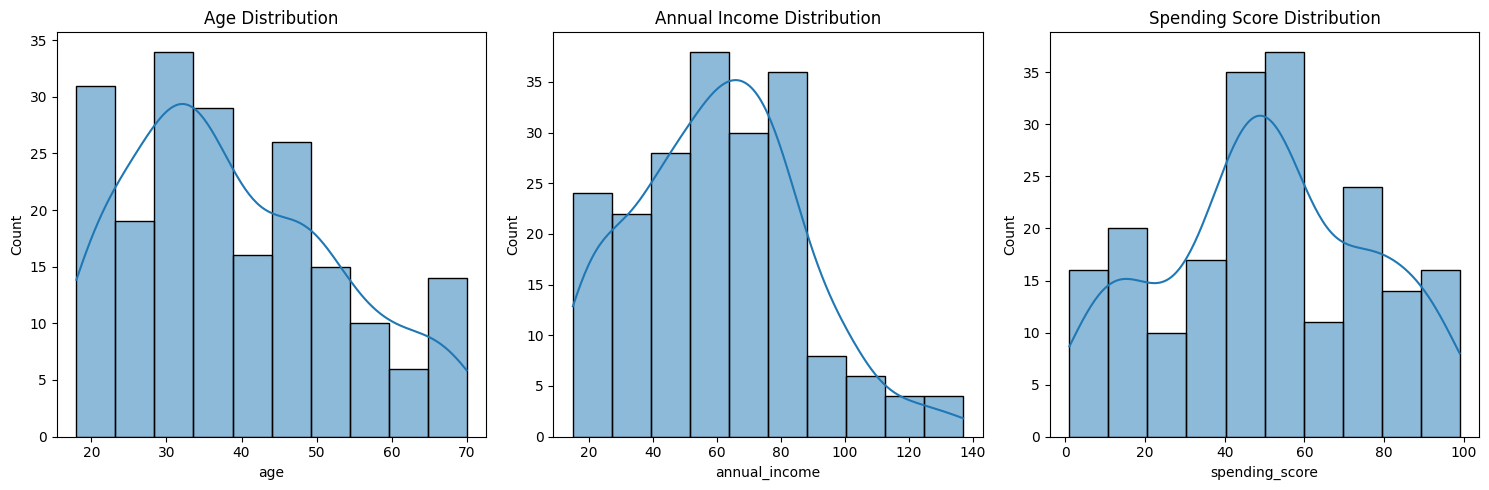

In [51]:
# Histograms for Age, Annual Income, and Spending Score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True, bins=10)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['annual_income'], kde=True, bins=10)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['spending_score'], kde=True, bins=10)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()


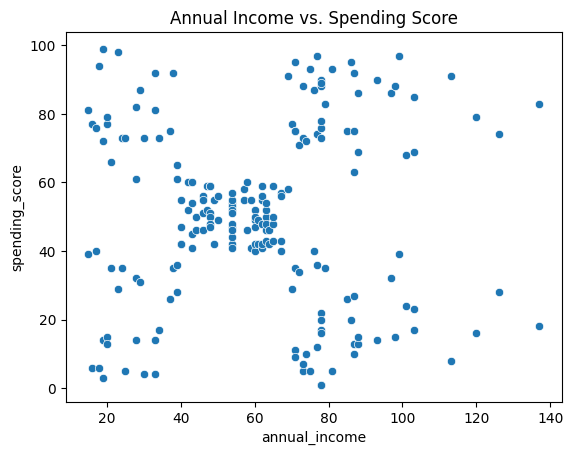

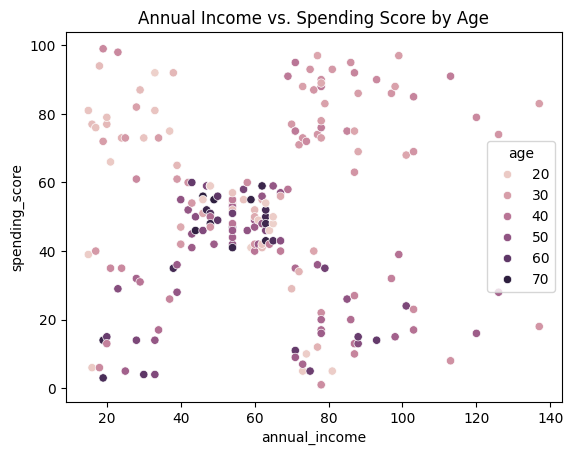

In [52]:
# Scatter plot for Annual Income vs. Spending Score
sns.scatterplot(data=df, x='annual_income', y='spending_score')
plt.title('Annual Income vs. Spending Score')
plt.show()

# Age groups and spending score
sns.scatterplot(data=df, x='annual_income', y='spending_score', hue='age')
plt.title('Annual Income vs. Spending Score by Age')
plt.show()

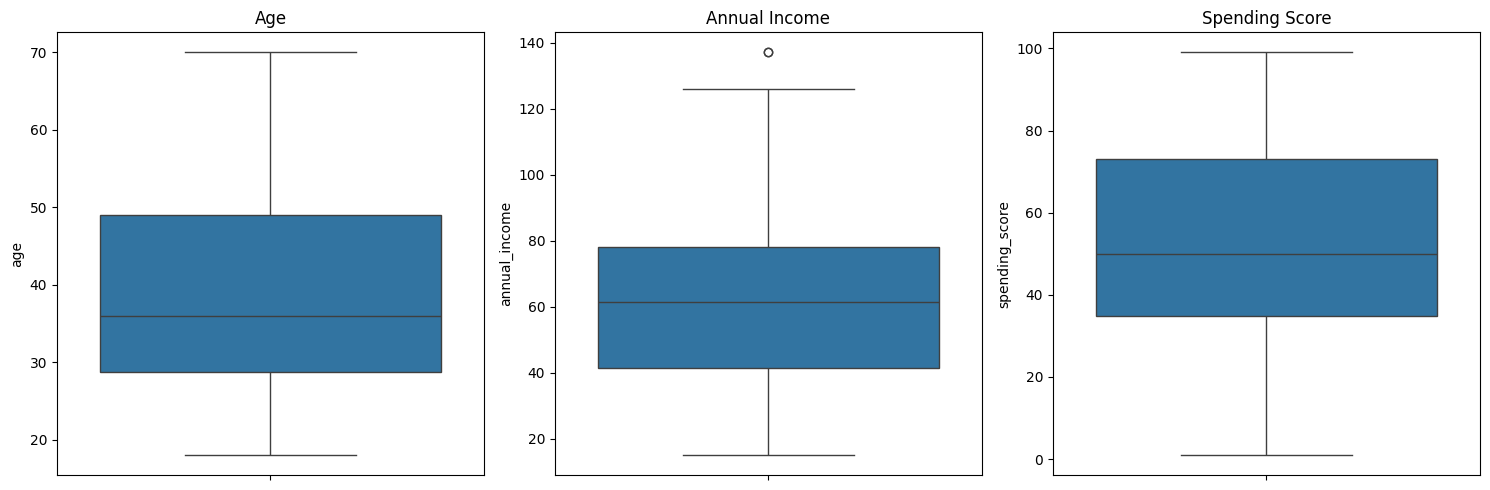

In [53]:
# Boxplots for Age, Annual Income, and Spending Score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['age'])
plt.title('Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['annual_income'])
plt.title('Annual Income')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['spending_score'])
plt.title('Spending Score')

plt.tight_layout()
plt.show()


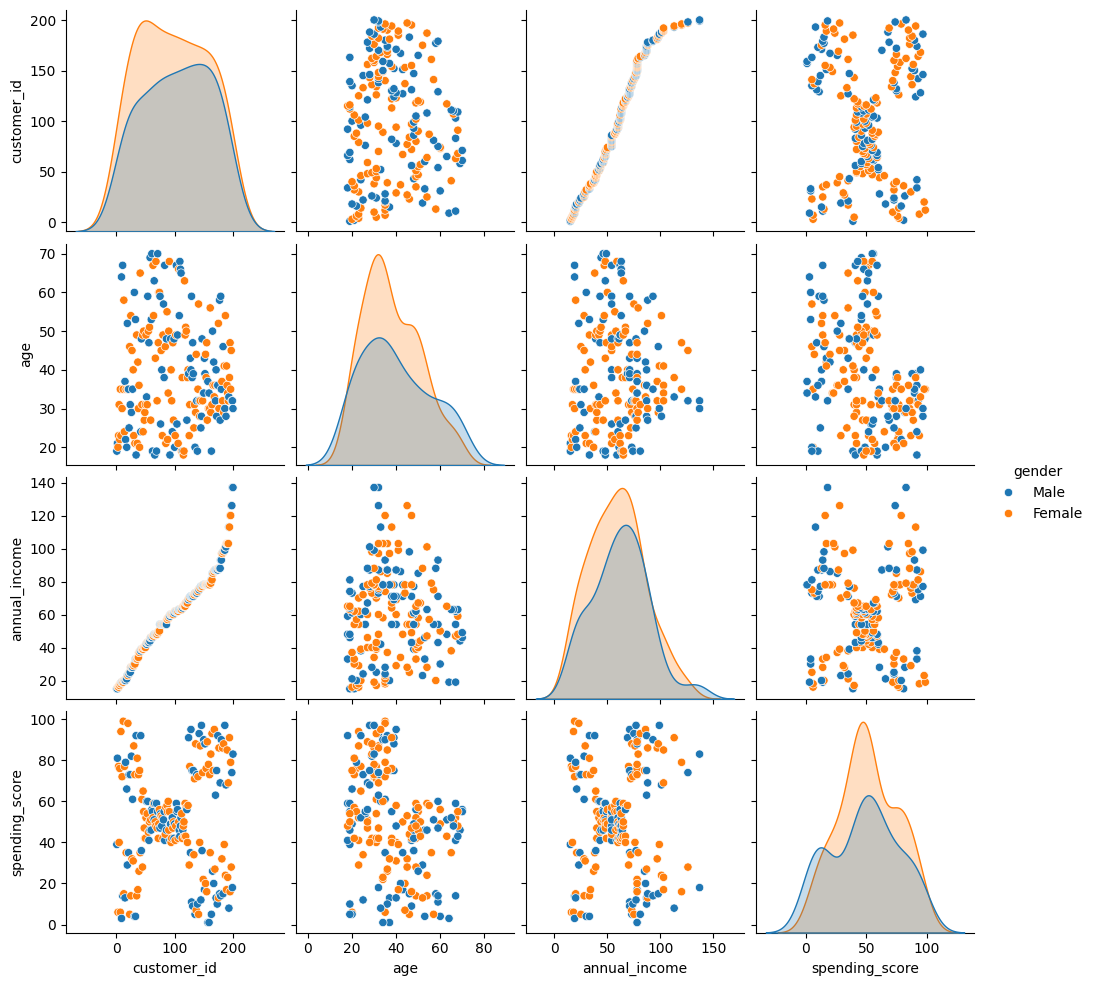

In [54]:
# Pair plot for all continuous variables
sns.pairplot(df, hue='gender')
plt.show()


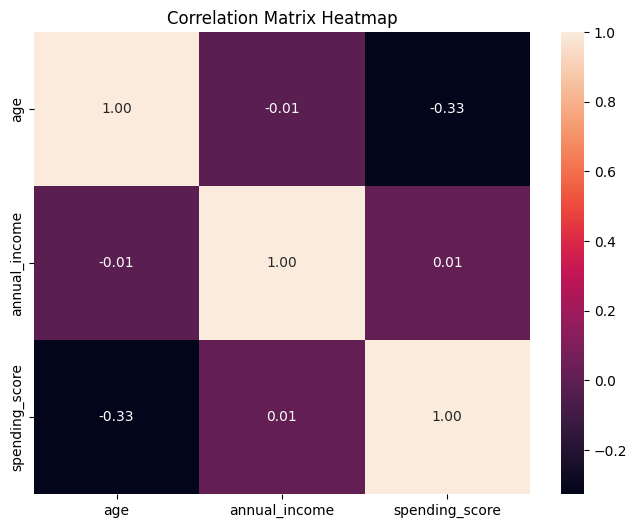

In [55]:
# Correlation matrix heatmap
corr_ = df[['age', 'annual_income', 'spending_score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_, annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Observations: Correlation

- Age and Spending Score: There is a negative correlation between age and spending score (approximately -0.33), suggesting that younger individuals tend to have a higher spending score. This could imply that as the customers' age increases, their spending score tends to decrease.
- Annual Income and Age: There is virtually no correlation between annual income and age (rounded to -0.01), which suggests that within this dataset, the annual income does not significantly increase or decrease with age.
- Spending Score and Annual Income: There is a very low positive correlation between annual income and spending score (0.01), indicating that there isn't a strong or evident relationship between how much customers earn and how much they spend within the scope of this data.

Observation summary:

- Age Distribution: The histogram shows a roughly bimodal distribution with peaks around the late 20s to early 30s and another smaller peak around the early 50s. There are fewer individuals in the youngest (<20 years) and oldest (>70 years) age groups within this dataset. The KDE curve follows the shape of the histogram, emphasizing the two peaks in the distribution.
- Annual Income Distribution: The distribution of annual income appears to be right-skewed, meaning that there are more individuals with lower incomes than there are with higher incomes. There's a peak at around the 50-60k dollar range, after which the frequency of individuals steadily decreases. The tail extending towards the higher income brackets suggests the presence of some higher earners in the dataset. However, the skewness indicates that these are relatively fewer in number.
- Spending Score Distribution: The spending score has a distribution that somewhat resembles a normal distribution but with slight right-skewness. The majority of data points are clustered around the middle score range, with fewer individuals having very low or very high spending scores. The peak of the distribution is around the 50 score mark.

The boxplots reveal that the median age of customers is in the mid-30s, the median annual income is skewed slightly higher within the interquartile range, and customers' spending scores vary widely but without extreme values. The outlier in annual income could be an area of interest for further investigation, as it might represent a unique customer segment or data entry error.

### Perform k-means clustering over this dataset using Manhattan distance

In [56]:
from sklearn.metrics import pairwise_distances
from sklearn.utils import check_random_state

class KMeansManhattan:
    def __init__(self, n_clusters, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initialize_centroids(self, X):
        random_state = check_random_state(self.random_state)
        centroids_idx = random_state.permutation(X.shape[0])[:self.n_clusters]
        return X[centroids_idx]

    def assign_labels(self, X, centroids):
        distances = pairwise_distances(X, centroids, metric='manhattan')
        return distances.argmin(axis=1)

    def update_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = X[labels == k].mean(axis=0)
        return centroids

    def fit(self, X):
        centroids = self.initialize_centroids(X)
        for i in range(self.max_iter):
            old_centroids = centroids
            labels = self.assign_labels(X, centroids)
            centroids = self.update_centroids(X, labels)
            if np.all(old_centroids == centroids):
                break
        self.cluster_centers_ = centroids
        self.labels_ = labels


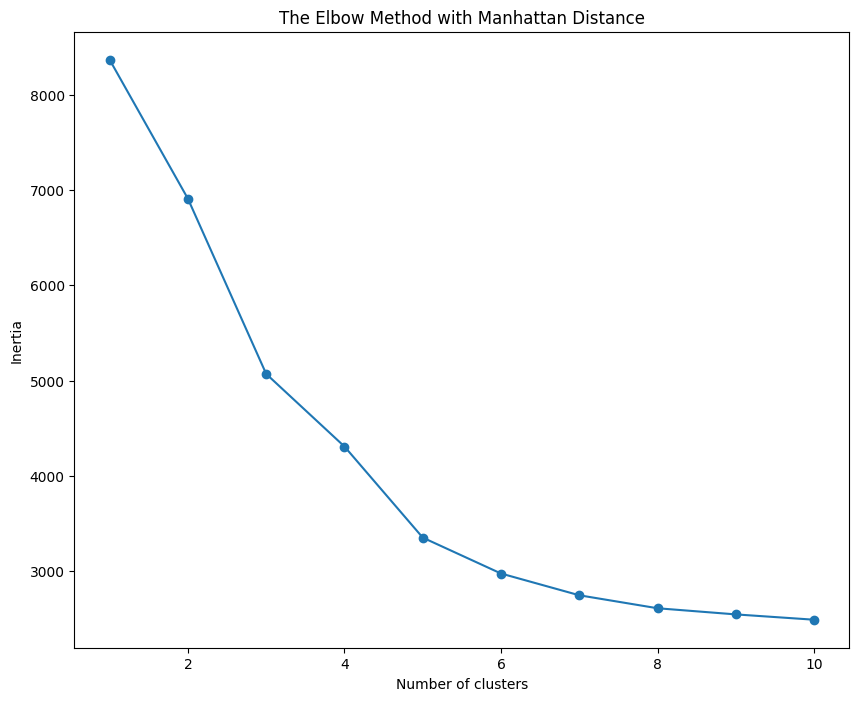

In [57]:

# Using only 'annual_income' and 'spending_score' for K-means clustering
X = df[['annual_income', 'spending_score']].to_numpy()

# Using the elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeansManhattan(n_clusters=i, random_state=8)
    kmeans.fit(X)
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    inertia.append(np.sum(np.min(pairwise_distances(X, cluster_centers, metric='manhattan'), axis=1)))

# Plot the elbow graph
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('The Elbow Method with Manhattan Distance')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Observation:

The rate of decrease in inertia becomes slower and tends to flatten out as we move towards 10 clusters. The "elbow" of the curve isn't sharply defined in this plot, but it seems to occur around 3 or 4 clusters, where the inertia begins to level off.

Therefore, based on this plot, we consider choosing either 3 or 4 as the optimal number of clusters for our K-means algorithm likely to be appropriate for this dataset.


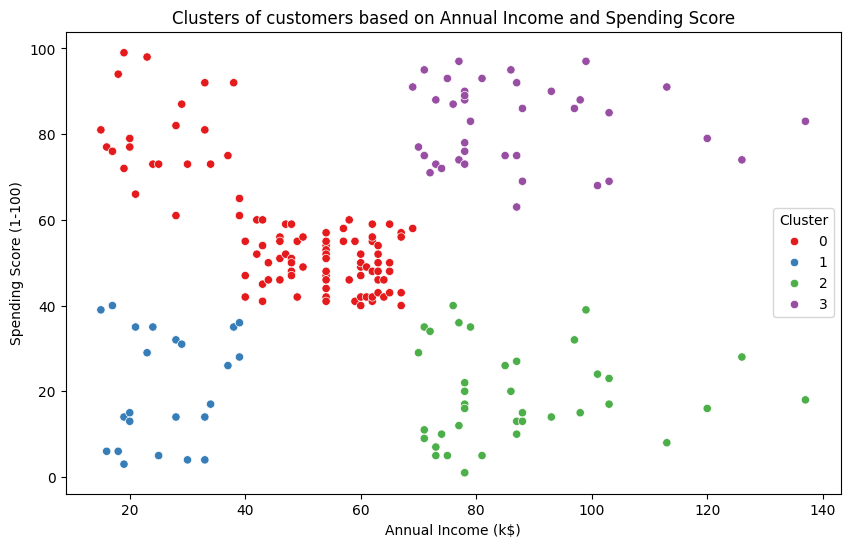

In [58]:
# Assuming we have chosen 4 as the optimal number of clusters based on the elbow plot
optimal_n_clusters = 4  # Adjusted optimal number of clusters
kmeans = KMeansManhattan(n_clusters=optimal_n_clusters, random_state=8)
kmeans.fit(X)

# Add the cluster labels to the dataframe
df['Cluster_Labels'] = kmeans.labels_

# Now we can analyze the clusters to see how they differ in terms of annual income and spending score
# We may also want to visualize the clusters to better understand their distribution
import seaborn as sns

# Scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='spending_score', data=df, hue='Cluster_Labels', palette='Set1')
plt.title('Clusters of customers based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


Here are the observations from the plot:

- Cluster 0 (Red): This cluster groups customers with high spending scores and high annual income. This segment could represent an attractive target for marketers since these individuals are both affluent and willing to spend.
- Cluster 1 (Blue): Customers in this cluster have low annual incomes and low spending scores. These might be more conservative or price-sensitive customers, possibly students or people with lower disposable incomes.
- Cluster 2 (Green): This cluster consists of customers with high annual incomes but lower spending scores. This could be a segment of savers or high earners who are not necessarily spending much, possibly older customers or individuals who are more investment-focused.
- Cluster 3 (Purple): The customers here have low to mid-level annual incomes but high spending scores. They might be younger or middle-aged individuals who prioritize spending on experiences or goods over saving.
The distinct groups suggest that different marketing strategies can be applied to each segment:

- Cluster 0 could be targeted with luxury goods, premium services, and loyalty programs.
- Cluster 1 may respond to discount offers, coupons, and value-oriented marketing.
- Cluster 2 might be interested in investment products, high-value items, and exclusive offers that denote status.
- Cluster 3 could be engaged with trend-based marketing, accessible luxury, and credit offers.

Overall, the segmentation indicates a diverse customer base, with each cluster having unique characteristics that can inform tailored marketing strategies and customer service approaches.

### Performing k-means clustering, extracting the groups or clusters and adding a separate column

In [59]:
# Profiling Clusters

# Calculate the mean values for 'annual_income' and 'spending_score' within each cluster
cluster_profile = df.groupby('Cluster_Labels').agg({'annual_income':'mean', 'spending_score':'mean'}).reset_index()

# Rename the columns for the cluster profile
cluster_profile.columns = ['Cluster_Labels', 'Mean_Annual_Income', 'Mean_Spending_Score']

# Print the cluster profiles
print(cluster_profile)


   Cluster_Labels  Mean_Annual_Income  Mean_Spending_Score
0               0           48.260000            56.480000
1               1           26.304348            20.913043
2               2           87.000000            18.631579
3               3           86.538462            82.128205


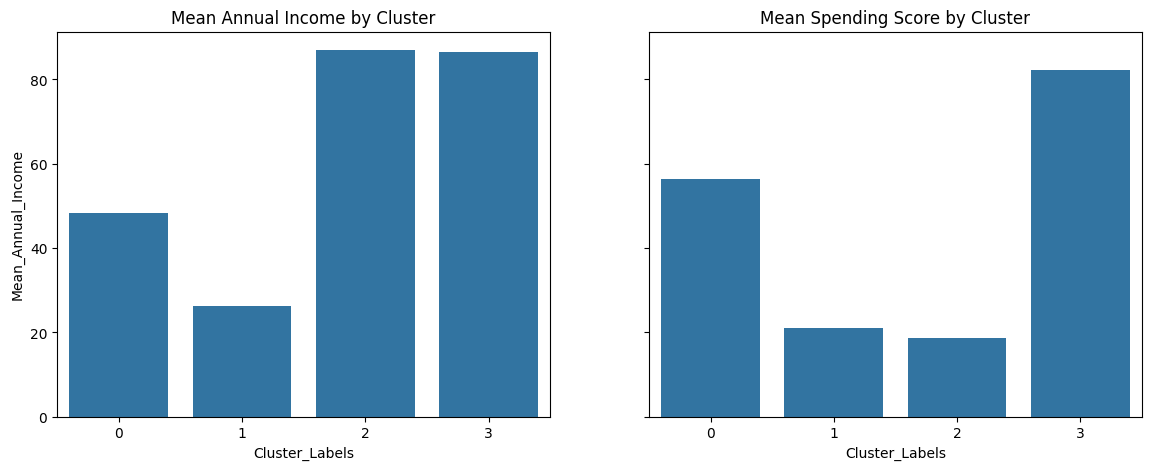

In [60]:

# Visualizing the cluster profiles using bar plots
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Mean Annual Income by Cluster
sns.barplot(x='Cluster_Labels', y='Mean_Annual_Income', data=cluster_profile, ax=ax[0])
ax[0].set_title('Mean Annual Income by Cluster')

# Mean Spending Score by Cluster
sns.barplot(x='Cluster_Labels', y='Mean_Spending_Score', data=cluster_profile, ax=ax[1])
ax[1].set_title('Mean Spending Score by Cluster')

plt.show()



In [61]:
# Additionally, we may want to analyze other demographic variables like age and gender if available
# For example, calculate the mean age and gender distribution within each cluster
if 'age' in df.columns and 'gender' in df.columns:
    demographic_profile = df.groupby('Cluster_Labels').agg({
        'age':'mean',
        'gender': lambda x: x.value_counts().index[0]  # Most common gender in the cluster
    }).reset_index()

    demographic_profile.columns = ['Cluster_Labels', 'Mean_Age', 'Common_Gender']
    print(demographic_profile)

   Cluster_Labels   Mean_Age Common_Gender
0               0  39.200000        Female
1               1  45.217391        Female
2               2  40.394737          Male
3               3  32.692308        Female


- Observations from 'Mean Annual Income by Cluster':
    - Clusters 2 and 3 have the highest mean annual incomes, which suggests these clusters contain customers with greater financial resources.
    - Cluster 1 has the lowest mean annual income, indicating these customers have less disposable income compared to the other segments.
    - Cluster 0 has a moderate mean annual income, higher than Cluster 1 but lower than Clusters 2 and 3.
- Observations from 'Mean Spending Score by Cluster':
    - Cluster 3 stands out with the highest mean spending score, indicating that these customers, despite their income being not the highest, tend to spend more.
    - Cluster 0 shows a moderate mean spending score, which is quite lower compared to Cluster 3 but higher than Clusters 1 and 2.
    - Clusters 1 and 2 have the lowest mean spending scores, suggesting these customers are more conservative with their spending. It's interesting to note that Cluster 2, despite having a high mean annual income, has a low mean spending score, which may indicate a segment of affluent but frugal customers.
    
From a business perspective, these insights could be used as follows:

- Cluster 3 could be targeted with a wide range of products and potentially more luxury or non-essential goods due to their higher spending habits.
- Clusters 2 might be approached with investment opportunities, savings plans, or higher-end products that are bought less frequently.
- Cluster 0 customers might be interested in a mix of value and quality in their purchases.
- Cluster 1, with lower income and spending, could be more responsive to discounts, promotions, and essential goods or services.


###  Standard classification task using logistic regression, decision trees, random forest, and Naive Bayes algorithm.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Encode categorical variables if necessary
if 'gender' in df.columns:
    le = LabelEncoder()
    df['gender'] = le.fit_transform(df['gender'])

# Prepare the dataset for training and testing
X = df.drop(['Cluster_Labels'], axis=1)
y = df['Cluster_Labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the classifiers
log_reg = LogisticRegression(max_iter=1000, random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
naive_bayes = GaussianNB()

# Train the classifiers
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

# Make predictions
pred_lr = log_reg.predict(X_test)
pred_dt = dec_tree.predict(X_test)
pred_rf = rand_forest.predict(X_test)
pred_nb = naive_bayes.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
# Evaluate each model
def evaluate_model(name, test, predictions):
    print(f"{name} Classifier:")
    print("Accuracy:", accuracy_score(test, predictions))
    print("Precision:", precision_score(test, predictions, average='macro'))
    print("Recall:", recall_score(test, predictions, average='macro'))
    print("F1 Score:", f1_score(test, predictions, average='macro'))
    print(classification_report(test, predictions))
    print("\n")

evaluate_model('Logistic Regression', y_test, pred_lr)
evaluate_model('Decision Tree', y_test, pred_dt)
evaluate_model('Random Forest', y_test, pred_rf)
evaluate_model('Naive Bayes', y_test, pred_nb)

Logistic Regression Classifier:
Accuracy: 0.9833333333333333
Precision: 0.9921875
Recall: 0.9833333333333334
F1 Score: 0.9874110563765737
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      1.00      1.00         5
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00         9

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60



Decision Tree Classifier:
Accuracy: 0.9833333333333333
Precision: 0.975
Recall: 0.9919354838709677
F1 Score: 0.9827437446074203
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        15
           3       0.90      1.00      0.95         9

    accuracy             

### Performance of these various supervised learning algorithm and comment on the homogeneity of clusters,

In [64]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Define a function for cross-validation and hyperparameter tuning
def train_evaluate_model(model, params, X_train, y_train, cv=5):
    grid_search = GridSearchCV(model, params, cv=cv, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='f1_macro')

    print(f"Best parameters for {type(model).__name__}: {grid_search.best_params_}")
    print(f"F1 Score (macro) - mean: {scores.mean()}, std: {scores.std()}\n")
    return best_model

# Hyperparameters for grid search
param_grid_lr = {'C': [0.1, 1, 10, 100]}
param_grid_dt = {'max_depth': [None, 10, 20, 30]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
param_grid_nb = {}  # Naive Bayes usually does not require hyperparameter tuning

# Train and evaluate each model
best_log_reg = train_evaluate_model(LogisticRegression(random_state=42), param_grid_lr, X_train, y_train)
best_dec_tree = train_evaluate_model(DecisionTreeClassifier(random_state=42), param_grid_dt, X_train, y_train)
best_rand_forest = train_evaluate_model(RandomForestClassifier(random_state=42), param_grid_rf, X_train, y_train)
best_naive_bayes = train_evaluate_model(GaussianNB(), param_grid_nb, X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for LogisticRegression: {'C': 100}
F1 Score (macro) - mean: 0.9568427294289362, std: 0.02330852575844585

Best parameters for DecisionTreeClassifier: {'max_depth': None}
F1 Score (macro) - mean: 0.9774227994227994, std: 0.03006578135761399

Best parameters for RandomForestClassifier: {'max_depth': None, 'n_estimators': 50}
F1 Score (macro) - mean: 0.9849783549783548, std: 0.030043290043290052

Best parameters for GaussianNB: {}
F1 Score (macro) - mean: 0.962799671592775, std: 0.054983110711250144



Observations:
- Logistic Regression has almost perfect metrics with slightly lower scores than the other models. It has a 98.33% accuracy and a macro F1 score of 0.9874. The precision and recall are also high, but in cluster 2, it has a slightly lower recall compared to the other clusters, which indicates that almost all instances were correctly identified, but there might have been one or two cases where members of cluster 2 were misclassified.
- Decision Tree also shows high accuracy at 98.33%, with a macro F1 score of 0.9827. The model has perfect precision and recall for clusters 1 and 2, and slightly less for clusters 0 and 3 due to a precision of 0.9 for cluster 3. This suggests that while the model is very good at identifying members of cluster 3, it might mistake some members of other clusters as belonging to cluster 3.
- Random Forest and Naive Bayes classifiers both achieved perfect scores across all metrics. This suggests that these models were able to classify all test instances into the correct clusters without any errors.
The cross-validation results for the F1 macro score (which considers both precision and recall) are also high across all models but show some variance, as indicated by the standard deviation. The mean F1 macro scores from cross-validation are slightly lower than the test scores, which is common since cross-validation scores are typically more conservative estimates of model performance.

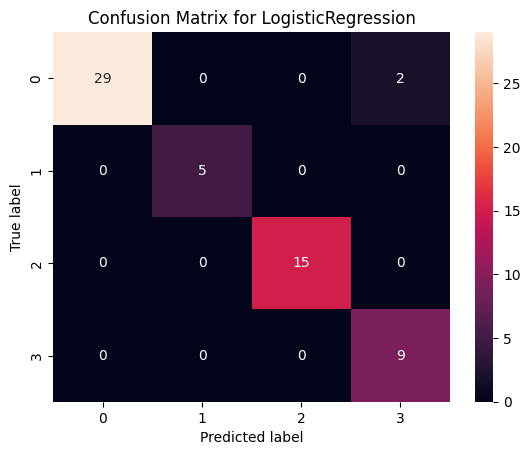

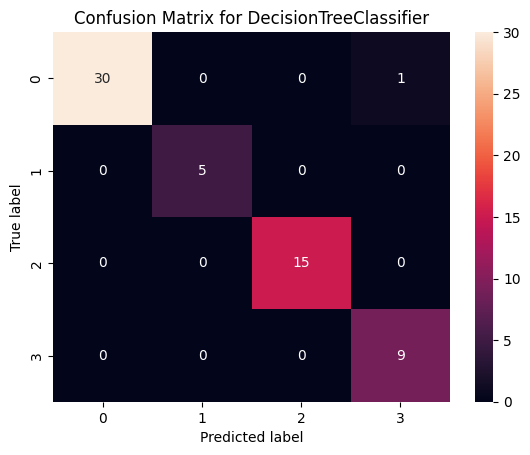

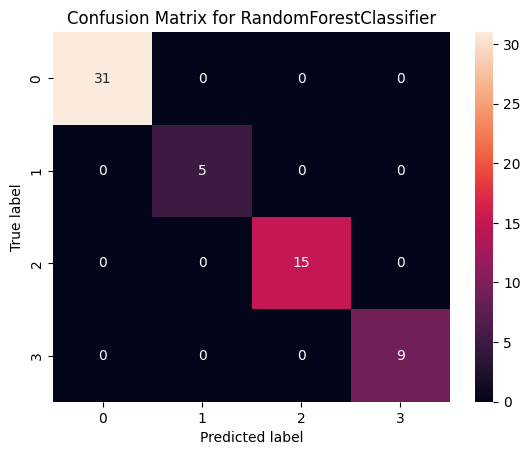

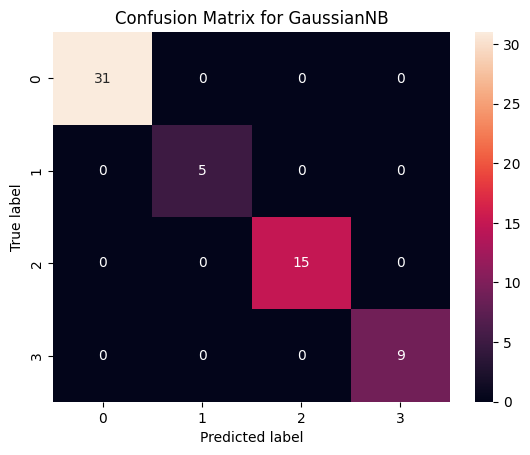

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {type(model).__name__}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrices for the best models
plot_confusion_matrix(best_log_reg, X_test, y_test)
plot_confusion_matrix(best_dec_tree, X_test, y_test)
plot_confusion_matrix(best_rand_forest, X_test, y_test)
plot_confusion_matrix(best_naive_bayes, X_test, y_test)



Brief analysis in three lines per classifier:

- Logistic Regression Confusion Matrix:
        The model correctly predicted most of the cluster labels, with a total of 29 for Cluster 0 and all others perfectly classified.
        There were two instances where Cluster 0 was misclassified as Cluster 3.
        No misclassifications occurred for Clusters 1 and 2, indicating high model precision and recall for these clusters.
- Random Forest Classifier Confusion Matrix:

        The model achieved perfect classification with all cluster labels predicted correctly.
        Cluster 0, Cluster 1, Cluster 2, and Cluster 3 all have correct predictions equal to their actual counts.
        This model shows the best performance with no evident errors, suggesting excellent cluster separation.
- Gaussian Naive Bayes Confusion Matrix:

        Similar to the Random Forest, the Gaussian Naive Bayes classifier has perfectly classified all instances in the test set.
        There are no misclassifications across any of the clusters.
        The perfect classification suggests that the features likely have a distribution that Naive Bayes can model well, and the clusters are very distinct.
- Decision Tree Classifier Confusion Matrix:

        The Decision Tree classifier almost perfectly predicted the cluster labels, with 30 correct for Cluster 0 and all correct for other clusters.
        Only one instance was misclassified, where a member of Cluster 0 was predicted as Cluster 3.
        The model is highly accurate with a slight error, suggesting a good fit to the data but not as perfect as Random Forest or Naive Bayes.
Each confusion matrix reflects the performance of the respective classifier, with Random Forest and Naive Bayes showing perfect classification, indicating highly distinct and well-separated clusters in the data. The Logistic Regression and Decision Tree classifiers show high accuracy with very few misclassifications.

### Cluster Homogeneity

The excellent performance across all classifiers on both the test set and cross-validation suggests that the clusters are very homogeneous. In other words, the members of each cluster share similar characteristics that make them easily distinguishable by the models. This is further supported by the high F1 scores, which indicate that precision and recall are both high, meaning that the models are both accurate and consistent in their predictions.